# **Project: House Prices (Regression)**
---




# 1 Group Members

> RANJANA BONGALE GANESH

> NISCHAL KHADKA



# 2 Introduction
  Everyone deserves to find their dream home! But, as we all know purchasing a home is one of the most critical decision and a lifetime event for many of the people because they have to put up all their years long savings into the down payment and monthly mortgages. With appropriate research using the data science tools and techniques, the house hunting process can be made much easier and help buyers land into their dream home. At the same time, the existing homeowners can also predict their house prices even before listing it. This project demonstrates how this data analysis can be performed on a sample dataset of house prices that is collected from Kaggle competition.


## 2.1 Problem Formulation
 There are tons of features listed for a home. Considering every feature when purchasing home can make decision process more complex. Picking the right features helps buyers to make better decisions in the home purchasing process. Based on this, what are the most important features a buyer should look at while purchashing a home? At the same time, for sellers, what are the features they should improve that could drastically increase their home value?

Generally, some of these most important features would be location, area of the home (including lot area), total number of bathrooms and bedrooms, garage area, overall quality and overall condition of the house.These features may play a major role in house price prediction.

**The goal is to predict the house price for the houses using EDA,data visualization techniques and modeling technique and find some of the important features that are highly correlated with the house to predict the house prices.**



## 2.2 Data Population

** The Data population according to the problem statement will be all the houses  that were sold at any time at any place.**

# 3 Data

The data set provided in Kaggle account is the house prices for houses with different features that were sold from year 2006 to 2010 in Ames, Iowa.

## 3.1 Kaggle Account

The *Account Name* of the Kaggle account that is created as part of this project is : **RanjanaNischal**

## 3.2 Loading the Dataset

In this section the above mentioned data will be downloaded, loaded into the notebook, inspected (print several lines of the each file) and describe what the data is for.

### 3.2.a Importing the libraries

Before loading the dataset important python libraries that are required for the data analysis will be imported.

In [ ]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, norm

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('fivethirtyeight')
%matplotlib inline

### 3.2.b Mounting google drive

Mount the good drive and go to the location where the data is downloaded.

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/Shareddrives/UW/house-prices/

### 3.2.c Importing the *data_description.txt* file

This section imports the data files that are downloaded in the previous step and inspects them by reading several lines from the files.

In [ ]:
# Open and read first 50 lines of 'data_description.txt' file
data_description_file = 'data_description.txt'
print(data_description_file, "======================")
with open(data_description_file, "r") as f:
    for i in range(50):
        print(i, "\t", repr(f.readline()))

**Description of the content of the file:** The file *data_description.txt* describes what each data column of file *train.csv* represents. For instance, the data column "*LotArea*" means lot size in square feet (sqft). Another instance is, the data column "*Street*" represent the type of road access to the house, for ex: whether it is Gravel or Paved.

### 3.2.d Inspecting the *train.csv* file

Now to get an overview of the training data this section will import the *train.csv* file and inspect it.

In [ ]:
# Open and read first 20 lines of 'train.csv' file
with open("train.csv", "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

**Description of the content of the file:** *train.csv* file contains the data of houses sales. The first row contains the column names, with "," as delimiter. Each column describes the features of the house. Each data record is separated by a new line that contains the values of the house sale.

###3.2.e Inspecting the *test.csv* file

Now to get an overview of the testing data this section will import the *test.csv* file and inspect it.

In [ ]:
# Open and read first 20 lines of 'test.csv' file
with open("test.csv", "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

**Description of the content of the file:** *test.csv* file contains similar kind of data that *train.csv* holds except that the values are different.

## 3.3 Data Wrangling

This section transforms the train data set into a data frame that will helpful for analysis and visualization. Later on each data property (i.e. structure, granularity, scope, temporality, and faithfulness) will be analysed and discussed in detail.

Below, the data from *train.csv* will be transformed into a data frame that will help to perform EDA and understand how each attribute (feature) is related with the house price.

In [ ]:
# Load 'train.csv' into a panda data frame
train_data_original = pd.read_csv('train.csv', sep = ',', header=0)
train_data_original

From above, the train data set contains 1460 records and 81 columns. An overview of the first 5 data records verifies that the data set is loaded perfectly. It can be observed that it has 81 columns, with some of the columns having missing values such as "Alley", "PoolQC", "Fence" etc., (here missing values or features with *NaN* means the house does not have those features). For example, only very few houses will have pools.

Next, the data from *test.csv* will be imported into a data frame similar to what is done previously.

In [ ]:
# Load 'test.csv' into a panda data frame
test_data_original = pd.read_csv('test.csv', sep = ',', header=0)
test_data_original

From above, the test data set contains 1459 records and only 80 columns (instead of 81 similar to training data set). This is because the `sales price` of the house is not present in the test data set.

### 3.3.a Structure of the data

The following code examines the structure of the train data set to get a better understanding of what each column type is.

1. How much data the train data set contains?
> From below, the train dataset is of 3.9 MB. The file is relatively small and could be easily examined in text editors.

2. How is it formatted?
 > The columns are mainly of types int64, float64 (numerical values) and objects (categorical values). Each column type can be observed below.

In [ ]:
# Display 'train' data frame information
train_data_original.info(memory_usage='deep')

Below code presents the **43** columns that hold only categorial values, that will be later on used for analysis and visualization. Apart from these, `MSSubClass`, `OverallQual` and `OverallCond` columns also hold categorical values. Thus, there are **46** columns that hold categorical values.

In [ ]:
# Filtering categorical values only from 'train' data set
temp_categ_data = train_data_original.select_dtypes(include=[np.object])
temp_categ_data.info()

Next, **38** columns that hold only float64 & int64 type values are presented. However, among them `MSSubClass`, `OverallQual` and `OverallCond` are categorical even though they are of numerical types. Also, `Id` is not a useful metric. If we remove these columns, there will be total of **34** columns that hold numberical values.

In [ ]:
# Filtering numerical values only from 'train' data set
temp_quant_data = train_data_original.select_dtypes(np.number)
temp_quant_data.drop(columns=['Id', 'MSSubClass', 'OverallQual', 'OverallCond'], inplace=True)
temp_quant_data.info()

Now the correlation between *categorical values vs sales price* will be visualized to understand which of the feature are most correlated to the sales price.

Similar to above, the correlation between *numerical values vs sales price* will be visualized to understand which of the feature are most correlated to the sales price.

From the above correlation matrix, The most correlated variables and the least correlated variables to salesprice can be observed.
Below is a list of most correlated values to salesprice :

1. OverallQual
2. GrLivArea
3. GarageCars   
4. GarageArea      
5. TotalBsmtSF     
6. 1stFlrSF        
7. FullBath         
8. TotRmsAbvGrd   
9. YearBuilt        
10. YearRemodAdd

From the above correlation to sales price, it can be inferred that most of the buyers looks into or consider the above mentioned features very crucial while purchasing the home.



### 3.3.b Granularity of the data



**In the Ames Dataset of the train and test data, each record represents details of all the features for each of the home at Ames,Iowa.The train and test files are a list of dictionaries with the key being the house ID and values being all the features of a home for each unique ID.The provided records are not granular at a detailed level as only the year built is provided but not the date and month the house was built.**

Here we are trying to understand how coarse or fine our data is.


The below table describes what each categorical value is representing. the `count` column indicates the number of non-null values. `unique` indicates the count of unique values. `top` indicates the most commonly occuring value and the frequency of occurence of top value is given by `freq`.

For example: MSoning represents 1460 non-null values. 5 unique zoning variables with RL(Residential with low density) being the highly frequent zone feature.
From here we can assume that approx. 78% of the total houses sold are houses in Residential low density zone.

1120/1460, 83% of the total houses are 1Fam(Single-family) detached.


In [ ]:
# Describing each categorical entry from 'train' data set
temp_categ_data.describe().transpose()

In [ ]:
# Describing each numerical entry from 'train' data set
temp_quant_data.describe().transpose()

The above two tables describe the Granularity of each record or attribute in detail.
But all the records do not represent Granularity at the same level. It can be observed that there is lot of variation in the mean and standard deviation of the data in the numerical values.Therefore, we have to perform aggregation on the numerical data and Categorical data. For example, sum aggregate can be used numerical valuessuch as bathrooms to get total number of bathrooms in a house [(FullBath)+1/2(HalfBath)+(BsmtFullBath)+1/2(BsmtHalfBath)]. For Categorical values, the most repeated item in an attribute or column can be found.


Now, let's investigate the data in greater detail. For example, Now let us see which month had the higher number of house sales.

In [ ]:
train_yearmonth_init = train_data_original.groupby(['YrSold','MoSold'])['Id'].count().to_frame()
f = train_data_original['MoSold'].unique()
f.sort()

arr = np.array(train_yearmonth_init['Id'])
arr = np.append(arr,[0]*5)
arr = arr.reshape(5,12)
train_yearmonth = pd.DataFrame(columns=f,index=[2006,2007,2008,2009,2010],data=arr)
train_yearmonth.transpose().plot(kind="bar",stacked=True)

From the above plot we get into much greater detail of each house sold during each month from year 2006 to 2010. It can be observed that most houses are are sold during june and july.

### 3.3.c Scope of the Data
There is missing data from the data provided in Kaggle account as the author Dean De Cook has mentioned that there were 3970 property sales had occured in Ames,Iowa from 2006 to 2010, but only 1460 property sales are available.

We know our dataset is from Ames, Iowa and contains 1460 houses data with 81 features which were sold between 2006 and 2010. The `Neighbour `column shows the physical locations within Ames city limits.
Our data population is limited to number of houses in Ames, Iowa from 2006 to 2011 and we don't have any evidence to use it to model or preict houses of other states or area. Our dataset is limited and we can only predict the SalePrice for Ames only.


### 3.3.d Temporality of the data

The data for the residential properties at Ames,Iowa used for analysis was collected in the year 2011 on March 24 by Dean De Cook from the Accessor's office in the form of Data dump from their record systems.The dataset colleted about the houses sold  was from 2006 to 2010. The data collected will not change over time beacause it is static.

From the below graph, it can be seen that the data is present in the dataset for the houses that were sold from 2006 to 2010.

In [ ]:
train_year = train_data_original.groupby(['YrSold'])['SalePrice'].count().to_frame()

train_year.plot.bar()
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel('Year')
plt.ylabel('No. of houses sold')
plt.title('No. of houses sold vs year')

### 3.3.e Faithfulness of the data
Now, let us check if the data provided is faithful and if we can trust this data.

Check the records entered in the accessor's office. The data is realistic because it was published on the American Statistical Association with document verification.
   Yes, the data can be trusted because it directly came from the accessor's office. But, when we see the plots of Numerical data it can be observed that thera are outliers in some recors such as in Lot Area, Total Basement in squarefeet etc., Missing and faulty values must be imputed.

There are no negative counts or misspellig of names in the data.Also, there are no repeated houses or duplicate id's in the data set.We can confirm this by seeing the unique values avilable for each dataset in train and test dataset.


## 3.4 Data Representive


### 3.4.a Is the data obtained is representative for the problem according to data population?
No, the data represents only a part of the our data population. It cannot predict the house prices for other cities inside Iowa or other states.

### 3.4.b Assumptions made
The assumptions that are needed that the analysis using the current given data can solve the problem for our data population are:


*   The distribution of most of the features present in the dataset provided will be the same for our Data population. Because anywhere in world the houses will have bedrooms, bathrooms, garage etc.,
*   The strret type will be same everywhere.
*   All the houses will have similar utilities.
*   All the houses will have similar central air conditioning system.

Therefore, these would be the assumptions that we have to make to apply our given data to the whole population of our problem statement.



## 3.5 Sample method used
Comparing the Data Population and the given data Cluster Sampling is used during the data collection because in Cluster sampling the population is divided into subgroups (In our case the Ames data is a subgroup) which represents or have similar charecteristics of the whole sample.
Here we have selected a subgroup which have similar charecteristics of the whole sample.

---------------------------------------------------------------------- **Project Stage 2** ----------------------------------------------------------------------

#4 EDA (Exploratory Data Analysis)

In this 2nd stage, we going to show how we transform the data based on EDA or use EDA to figure out certain features that we will use for modeling. Then, we will apply our own chosen model (one model) to conduct modeling for prediction.The data we have right now may not be even ready for simple EDA.

Below, we use EDA and Data transformation to our data to make it ready for prediction.

Below is a plot to get a better understanding of how the dependent variable(Saleprice) is related with all the other features. So Saleprice is pllotted against all other features.

## 4.1 Examine Features with categorical values using EDA

In [ ]:
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20, 70))
plt.subplots_adjust(hspace=0.3)
axe = axes.ravel()

for col_num, col_name in enumerate(temp_categ_data.columns):
  train_data_original.groupby(col_name)['SalePrice'].mean().plot.bar(xlabel=col_name, ax=axe[col_num])

fig.suptitle('Categorical Values vs Mean Sales Price', fontsize=25, y=0.89)

It can be observed that only a few Categorical features have a strong impact on the Salesprice.
A fully paved drive, an excellent Fireplace quality, a paved street and excellent material quality on the exterior of the house, completely finished garage, an central air system have correlation with the highest sales price.

## 4.2 Examine Features with numerical values using EDA

Plot of Numerical values against Salesprice

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(25, 40))
plt.subplots_adjust(wspace=0.3)
axe = axes.ravel()

for col_num, col_name in enumerate(temp_quant_data.columns):
  train_data_original.plot.scatter(x=col_name, y='SalePrice', edgecolor='black', ax=axe[col_num])

fig.suptitle('Numerical Values vs Sales Price', fontsize=30, y=0.89)

From the above numeric plots against Salesprice, we can hypothize that The variables with actual dimensions of the houses like the Total Basement area,living area above groung have a large impact on saleprice.


1.   It can be observed that there are a lot of values at 0, it can mean null values or it can actually represent that the house does not have that feature.We need to analyze each feature and deal with these values before prediction.
2.   Some of the variables like GrLivArea tend to follow a similar pattern as the Saleprice, and thus they might be good indicators.
3. Also, it can be observed that features like yearsold and month sold does not have a strong relationship with Saleprice.



## 4.3 Examine Correlation using EDA

**Let us see the correlation of the data according to the sale price**

In [ ]:
corr = train_data_original.corr()
correlation_data = corr['SalePrice'].sort_values(ascending=False).to_frame().rename(columns={"SalePrice": "Correlation With SalePrice"})
correlation_data

The correlation coefficient has values between -1 to 1
1.   A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2.   A value closer to 1 implies stronger positive correlation
3.   A value closer to -1 implies stronger negative correlation

From the above correlation table we can see that Miscval, BsmtHalfBath and BsmtFinSF2 have the least or almost no correlation with the salesprice.
Therefore, we will drop these columns from both our train and test data in Data Transformation part.(Note:we are not dropping the 3snPorch because we will use it later in feature merging and then drop it)

In [ ]:
corr_plot = correlation_data.plot.barh(figsize=(15, 15), title="Correlation of Feature with Sale Price (Before feature selection)")
corr_plot.axvline(-0.02, color='r')
corr_plot.axvline(0.02, color='r')

# 5 Data Cleaning and Transformation

Below, a detailed description of transformations applied to the data is provided along with the reason of why the transformations are applied.

In [ ]:
print(train_data_original.isna().sum().to_string())

From the train and test data table we can see that there are lot of missing or na values in some of the features. But in some features the missing values is not actually the missing values, infact they represent a value.
For example:
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	 No alley access
Here, we can see that NA means no alley access and hence it is not a missing value.

We will impute the missing values in the Data Cleaning section(5.3).

In [ ]:
print(test_data_original.isna().sum().to_string())

## 5.1 Removing Outliers

Now that our dataset needs to be cleaned, we will first remove the outliers from our data because outliers will dominate our estimation. These outliers are bad data for our general prediction and removing outliers help us have stronger relationship with the Salesprice.

 ### 5.1.a Based on Features

 As observed in the EDA **section 4.2** plot of numerical values against saleprice, we can observe that some of the features have outliers.So, we will examine them below.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
axe = axes.ravel()

outliers_identified_features = ['GrLivArea', 'EnclosedPorch', 'LotArea','TotalBsmtSF', 'LotFrontage', '1stFlrSF']

for col_num, col_name in enumerate(outliers_identified_features):
  train_data_original.plot.scatter(x=col_name, y='SalePrice', edgecolor='black', ax=axe[col_num])

fig.suptitle('Features vs Sale Price (Before removing outliers)', fontsize=30, y=0.94)

In [ ]:
# Removing outliers based on features
train_data_without_outliers = train_data_original[(train_data_original['GrLivArea'] < 4000)]
train_data_without_outliers = train_data_without_outliers[(train_data_without_outliers['EnclosedPorch'] < 400)]
train_data_without_outliers = train_data_without_outliers[(train_data_without_outliers['LotArea'] < 100000)]
train_data_without_outliers = train_data_without_outliers[(train_data_without_outliers['TotalBsmtSF'] < 3000)]
train_data_without_outliers = train_data_without_outliers[(train_data_without_outliers['LotFrontage'] < 250)]
train_data_without_outliers = train_data_without_outliers[(train_data_without_outliers['1stFlrSF'] < 4000)]
train_data_without_outliers = train_data_without_outliers[(train_data_without_outliers['MasVnrArea'] < 2000)]

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
axe = axes.ravel()

outliers_identified_features = ['GrLivArea', 'EnclosedPorch', 'LotArea','TotalBsmtSF', 'LotFrontage', '1stFlrSF']

for col_num, col_name in enumerate(outliers_identified_features):
  train_data_without_outliers.plot.scatter(x=col_name, y='SalePrice', edgecolor='black', ax=axe[col_num])

fig.suptitle('Features vs Sale Price (After removing outliers)', fontsize=30, y=0.94)

### 5.1.b Based on Sale Price

In [ ]:
red_diamond = dict(markerfacecolor='r', marker='D')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
axe = axes.ravel()

sale_price_box_plot = axes[1].boxplot(train_data_original['SalePrice'], vert=False, whis=4, flierprops=red_diamond)
axes[1].set_xlabel("Sale Price")
axes[1].set_title("House Sales Price Box plot")

bottom_cap = sale_price_box_plot['caps'][0].get_xdata()[0]
top_cap = sale_price_box_plot['caps'][1].get_xdata()[0]

print("Outlier Upper Bound (Q3 + 3 * IQR): " + top_cap.astype(str))
print("Outlier Lower Bound (Q3 - 3 * IQR): " + bottom_cap.astype(str))

axes[0].hist(train_data_original['SalePrice'], bins=40, label='Sale Price')
axes[0].set_xlabel("Sale Price")
axes[0].set_ylabel("Frequency")
axes[0].set_title("House Sales Price Histogram")
axes[0].axvline(34900.0, color='r', label='Outlier lower bound (Q3 - 4 * IQR)')
axes[0].axvline(465000.0, color='g', label='Outlier upper bound (Q3 + 4 * IQR)')
axes[0].legend()

fig.suptitle('Graphs of House Sale Price (Before removing outliers)', fontsize=20, y=0.94)

plt.show()

In [ ]:
train_data_without_outliers = train_data_without_outliers[(train_data_without_outliers['SalePrice'] > bottom_cap) & (train_data_without_outliers['SalePrice'] < top_cap)]

train_data_original_rows_count = train_data_original.shape[0]
train_data_without_outliers_rows_count = train_data_without_outliers.shape[0]

print("Number of entries removed = " + str(train_data_original_rows_count - train_data_without_outliers_rows_count))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
axe = axes.ravel()

axes[0].hist(train_data_without_outliers['SalePrice'], bins=40, label='Sale Price')
axes[0].set_xlabel("Sale Price")
axes[0].set_ylabel("Frequency")
axes[0].set_title("House Sales Price Histogram")
axes[0].legend()

sale_price_box_plot = axes[1].boxplot(train_data_without_outliers['SalePrice'], vert=False, whis=4, flierprops=red_diamond)
axes[1].set_xlabel("Sale Price")
axes[1].set_title("House Sales Price Box plot")
axes[1].legend()

fig.suptitle('Graphs of House Sale Price (After removing outliers)', fontsize=20, y=0.94)

plt.show()

## 5.2 Combine train and test datsets

 To preprocess the data i.e., to impute the missing values and to provide a proper meaning to the other na values, let us combine both the train and the test data for pre-processing (to impute the missing values and to provide a proper meaning for some of the NA values )

The train and test datasets are combined because when we try to take the mean(numerical) or mode(categorical) of the each feature we will have more information on the data.
Once we are done with the preprocessing we will again seperate the two datasets.
While combining we have to be very careful and take care of each step, that we don't shuffle the data at any point. So we are just goin to stack it upon each other.

The test_data does not have a target column 'SalePrice' as the train_data because we will be using the test_data to predict the house prices. So, save the target column of the test data and drop the column 'SalePrice'.
Similarly, we do not require the ID column for the train data as will be using test data only for predicting the house prices.
Drop both these columns before concatenation.

In [ ]:
train_data_ids = train_data_without_outliers['Id']
train_data_sale_price = train_data_without_outliers['SalePrice']
test_data_ids = test_data_original['Id']

train_data_without_id_target = train_data_without_outliers.drop(['Id', 'SalePrice'], axis=1)
test_data_without_id = test_data_original.drop(['Id'], axis=1)

combined_data = pd.concat([train_data_without_id_target, test_data_without_id], axis=0)
combined_data.info(memory_usage='deep')

## 5.3 Data Cleaning

Now we are preparing our data(Readiness of the data) for modeling.

### 5.3.a Ensure features are of appropriate datatypes

In [ ]:
numerical_only_data = combined_data.select_dtypes(np.number)
numerical_only_data

From the above table it can be observed that three of the categorical values ['MSSubclass', 'OverallQual','OverallCond'] is defined as numerical.

In [ ]:
combined_data = combined_data.astype({
    'MSSubClass': 'object',
    'OverallQual': 'object',
    'OverallCond': 'object'
})

numerical_only_data = combined_data.select_dtypes(np.number)
numerical_only_data

In [ ]:
categorical_only_data = combined_data.select_dtypes(np.object)
categorical_only_data

### 5.3.b Imputing missing values

First, let us look into the missing values in categorical data.

In [ ]:
categorical_only_data.isna().sum()

 If we go through description.txt we  have a column named "Alley" and it has a list of values, one of which is NA, which stands for "No Alley". However, Pandas interprets this as NaN.These variables don't actually have null/missing values. These are just variables whose values are being misinterpreted by Pandas.So whichever columns has value for NaN like the Alley column, we are replacing them with "None". The columns which actually have missing/null values, we replace them with mode of that respective column.

In [ ]:
categorical_cols_with_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                            'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                            'GarageType', 'GarageFinish', 'GarageQual',
                            'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
combined_data[categorical_cols_with_na] = combined_data[categorical_cols_with_na].fillna("None")

categorical_cols_with_null = ['MSZoning', 'Utilities', 'Exterior1st',
                              'Exterior2nd', 'MasVnrType', 'Electrical',
                              'KitchenQual', 'Functional', 'SaleType']
combined_data[categorical_cols_with_null] = combined_data[categorical_cols_with_null].fillna(combined_data[categorical_cols_with_null].mode().iloc[0])

combined_data.select_dtypes(np.object).isna().sum()

Now, let us inspect the missing values in numerical features or columns.

In [ ]:
numerical_only_data.isnull().sum()

From the above table we can see that there are missing values in the numeric columns and we replace the missing values with the median of the respetive column.



In [ ]:
numerical_cols_with_null = numerical_only_data.columns[numerical_only_data.isna().sum() > 0]

combined_data[numerical_cols_with_null] = combined_data[numerical_cols_with_null].fillna(combined_data[numerical_cols_with_null].median().iloc[0])

combined_data.select_dtypes(np.number).isna().sum()

In [ ]:
combined_data.isna().sum().sum()

From the above section, it can be seen that all the missing values of train and test dataset are imputed.

##5.4 Data Transformation

## 5.5 Feature Merging

We are merging some of the features from the dataset to provide a better understanding of what each house consists of at a higher level. For example : we can merge all the Bathrooms of a house into a single feature called TotalBaths so that the redundant columns can be removed or dropped.

In [ ]:
combined_data = combined_data.astype({
    'LotFrontage': 'int',
    'MasVnrArea': 'int',
    'GarageYrBlt': 'int'
})

In [ ]:
combined_data['TotalBath'] = combined_data['FullBath'] + (0.5 * combined_data['HalfBath']) + combined_data['BsmtFullBath'] + (0.5 * combined_data['BsmtHalfBath'])
combined_data.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], inplace=True)

combined_data['TotalPorch'] = combined_data['OpenPorchSF'] + combined_data['EnclosedPorch'] + combined_data['3SsnPorch'] + combined_data['ScreenPorch']
combined_data.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)

combined_data_temp = combined_data.astype({
    'OverallQual': 'int',
    'OverallCond': 'int'
})     #For merging categorical values, convert them to numerical datatype first and stoe in temporary location and then apply merging.

combined_data['OverallHouseScore'] = ((combined_data_temp['OverallQual'] + combined_data_temp['OverallCond'])/2).astype(int)
combined_data.drop(columns=['OverallQual', 'OverallCond'], inplace=True)

combined_data

##5.6 Log Transformation
Describe the transformations of the data you have applied if applicable. Why or Why not?

We have applied Log transformation for our dataset because Log transformation provides better distribition of data for each feature.
It also helps us visualize the data better by not hiding important data by the outliers.
It is also very useful to provide better linear relationship. In our dataset we can observe that most of the features that are linearly related with the salesprice helps us predict better houseprices.

Originally,our data features and salesprice are skewed and also do not have a proper linear relationship because of the outliers.After applying log trnsformation we will have linear model which will help us to easily make predictions.

Below, we see how much are our features skewed and if it is positively skewed or negatively skewed. Then we take absolute value of the skewed features and apply log transformation to only those features whose skewness is greater that 0.5 for highly skewed data.

In [ ]:
skew_data = pd.DataFrame(combined_data.select_dtypes(np.number).columns, columns=['Feature'])
skew_data['Skew'] = skew_data['Feature'].apply(lambda feature: skew(combined_data[feature]))
skew_data['Absolute Skew'] = skew_data['Skew'].apply(abs)
skew_data['Skewed'] = skew_data['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_data

Log1p here is applied because some of the features contains 0 values.Log(0) would lead to infinity.Therefore log+1 is applied to avoid such mistake.

In [ ]:
skew_cols = skew_data.query("Skewed == True")['Feature'].values

for column in skew_cols:
    combined_data[column] = np.log1p(combined_data[column])

## 5.7 Feature Selection

What are the features you choose to use for modeling? Why? Note: You may use EDA to show the reason.

We are choosing features which have strong relationship with the salesprice because all of the features we find in the dataset might not be useful in building a model to make the necessary prediction. Using some of the features might even make the predictions worse. So, feature selection plays a huge role as they will help us predict better house prices.

Also, we get to know that if the features are highly correlated with the target column (Saleprice in our case) then we can say that the prediction of the dependent target variable depends on these correlated features.



After analysing the correlation in EDA section (4.3),we have dropped the features that have least correlation or no correlation in the below code.

In [ ]:
combined_data.drop(columns=['MiscVal', 'BsmtFinSF2'], inplace=True)

Correlation of the features with Saleprice after feature selection.We will be using the below features for training the data and predicting the house prices.

In [ ]:
train_data_with_selected_features = train_data_without_outliers.drop(columns=['MiscVal', 'BsmtFinSF2'])
corr = train_data_with_selected_features.corr()
correlation_data = corr['SalePrice'].sort_values(ascending=False).to_frame().rename(columns={"SalePrice": "Correlation With SalePrice"})

corr_plot = correlation_data.plot.barh(figsize=(15, 15), title="Correlation of Feature with Sale Price (After feature selection)")
corr_plot.axvline(-0.02, color='r')
corr_plot.axvline(0.02, color='r')

## 5.8 Applying dummies for categorical values

Many machine learning algorithms can support categorical values without further manipulation.Theerefore pd.get_dummies converts Categorical variables into indicator variables. This helps us to use the Categorical features in our analysis.

In [ ]:
combined_data_with_dummies = pd.get_dummies(combined_data)
combined_data_with_dummies

## 5.9 SalePrice Transformation

Log transformation of the Salesprice feature helps us get a better distribution as we can see in the below plot that after log transformation, we have a normal distribution.

In [ ]:
train_data_sale_price_log = np.log(train_data_sale_price) ## Todo Graph

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axe = axes.ravel()

sns.distplot(train_data_sale_price, kde=True, fit=norm, ax=axe[0])
axe[0].set_title("Without Log Transform")

sns.distplot(train_data_sale_price_log, kde=True, fit=norm, ax=axe[1])
axe[1].set_xlabel("Log SalePrice")
axe[1].set_title("With Log Transform")

fig.suptitle('Categorical Values vs Mean Sales Price', fontsize=25, y=0.95)

## 5.10 Seperating Train and Test data

Now, Our data is ready for prediction after cleaning and transformation.We now split back the train and test datasets for prediction purpose.

In [ ]:
train_data_cleaned = combined_data_with_dummies.iloc[:train_data_without_outliers_rows_count, :]
train_data_cleaned

In [ ]:
test_data_cleaned = combined_data_with_dummies.iloc[train_data_without_outliers_rows_count:, :]
test_data_cleaned

# 6 Model Selection and Prediction

## 6.1 Model Selection

**Describe the chosen model and why choose this one**.

We have chosen Multiple Linear Regression model because our target column has continous numerical variables and we have multiple independent columns.Also, Linear model is very simple model and the target value is expected to be a linear combination of the features. In the data present, the salesprice has a strong linear relationship with most of the features.The coefficients are set to minimize the residual sum of squares between the target predicted and the observed features.So, we believe that multiple linear regression will be useful for better modelling and prediction.


**Describe how the chosen features in 1.2 is involved in the chosen model**.

The equation for multiple regression takes the form:
y = B_1 * x_1 + B_2 * x_2 + … + B_n * x_n + A
In this equation,  x_1 is the value of the first independent variable, x_2 is the value of the second independent variable, and so on. It keeps going as more and more independent variables are added until the last independent variable, x_n, is added to the equation.
We can model our various chosen features with this multiple regression model parameters as it tries to create a linear relationship with our sales price
This is how the chosen features are involved with the model



**Describe the loss function that will be used to estimate the model's parameters.**

Linear Regression model from Scipy library implicitly uses *Mean Squared Error (MSE)* as the loss function to estimate the model's parameters. Root mean square error (RMSE) is a measure of how spread out the data points are from the linear line. In other words, it tells us how concentrated the data is around the line of best fit.

**Use a specific way (different ways have been discussed in A3) to estimate the model's parameters**.

We used *fit* method in Linear regression model, from the Scikit-learn, the model's parameters are estimated to minimize the mentioned above loss function (i.e. mean squared error)



In [ ]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(train_data_cleaned, train_data_sale_price_log)

In [ ]:
linear_model.coef_, linear_model.intercept_

## 6.2 Prediction on Train Data

In [ ]:
train_data_predicted_sale_price_log = linear_model.predict(train_data_cleaned)
train_data_predicted_sale_price = np.exp(train_data_predicted_sale_price_log)

print("RMSE of Linear model over pridiction on train dataset: " + str(np.sqrt(mean_squared_error(train_data_sale_price, train_data_predicted_sale_price))))

In [ ]:
pd.DataFrame(train_data_predicted_sale_price, columns=['SalePrice'])

## 6.3 Prediction on Test Data

In [ ]:
test_data_predicted_sale_price_log = linear_model.predict(test_data_cleaned)
test_data_predicted_sale_price = np.exp(test_data_predicted_sale_price_log)
test_results = pd.DataFrame(test_data_predicted_sale_price, columns=['SalePrice'])
test_results.insert(0, 'Id', test_data_ids)
test_results

In [ ]:
test_results.to_csv('final_test_results.csv', index=False)

**Use the model estimated to conduct a submission to the Kaggle competition and screenshot your leaderboard position.**

#7 Kaggle Competition Rank
Since we have just analyzed using one model, we have gotten a rank of 4783 for our first entry
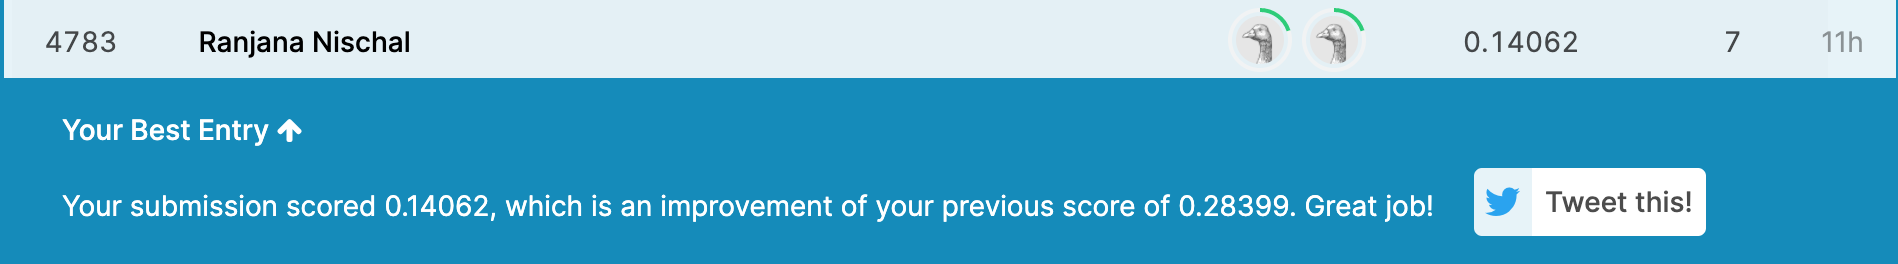

================================== **FINAL PROJECT STAGE** ==============================================

#8 Model Comparison using Cross Validation

Below, we have defined a function that applies 10 KFold splits and returns the RMSE vector and Average RMSE across the validation splits for both the models.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def compute_CV_RMSE(model_A, model_B, X_train, Y_train):
    '''
    Split the training data into 10 subsets.
    For each subset,
        fit models holding out that subset
        compute the RMSE on that subset (the validation set)
    You should be fitting 10 models total.
    Return RMSE and average RMSE of modelA and modelB

    Args:
        model_A and model_B: sklearn models with fit and predict functions
        X_train (data_frame): Data
        Y_train (data_frame): Label

    Return:
        Error vector containing 10 RMSE for model_A
        Error vector containing 10 RMSE for model_B
        the average RMSE for the 10 splits of model_A
        the average RMSE for the 10 splits of model_B
    '''
    kf = KFold(n_splits=10)
    validation_RMSE_A = []
    validation_RMSE_B = []

    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train[train_idx], X_train[valid_idx]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the model_A on the training split
        model_A.fit(split_X_train, split_Y_train)

        # Compute the prediction error(RMSE) on the validation split
        split_Y_valid_pred = model_A.predict(split_X_valid)
        RMSE_A = mean_squared_error(split_Y_valid, split_Y_valid_pred, squared=False)

        validation_RMSE_A.append(RMSE_A)

        # Fit the model_B on the training split
        model_B.fit(split_X_train, split_Y_train)

        # Compute the prediction error(RMSE) on the validation split
        split_Y_valid_pred = model_B.predict(split_X_valid)
        RMSE_B = mean_squared_error(split_Y_valid, split_Y_valid_pred, squared=False)

        validation_RMSE_B.append(RMSE_B)

    return validation_RMSE_A, validation_RMSE_B, np.mean(validation_RMSE_A), np.mean(validation_RMSE_B)

We have chosen two models in our favor, one being **Bayesian Regression** and the other **Ridge Regression **and performed Cross Validation with the same 10 Fold splits applied to each model.
We then compare both models based on the average error.


In [ ]:
from sklearn.linear_model import RidgeCV, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

train_cleaned_input_data = train_data_cleaned.values
train_output_data = train_data_sale_price.values
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
model_A=BayesianRidge()
model_B=make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt))
bayesian_RMSE, ridge_RMSE, bayesian_avg_RMSE, ridge_avg_RMSE = compute_CV_RMSE(
    model_A,model_B,
    X_train=train_cleaned_input_data,
    Y_train=train_output_data)

print("========================================================")
print("Bayesian Regression Model RMSE: {}".format(bayesian_RMSE))
print("Ridge Model RMSE: {}".format(ridge_RMSE))
print("========================================================")
print("Bayesian Regression Model Avg RMSE: " + bayesian_avg_RMSE.astype(str))
print("Ridge Model Avg RMSE: " + ridge_avg_RMSE.astype(str))
print("========================================================")

Based on the above results, we can conclude that Model_b(Ridge Regression) has less error(RMSE) compared to Model_A(Bayseian Regression) for the House price prediction problem.

##8.1 Statistical Inference

We calculate the T-test, to sufficiently tell if one model is **significantly** better than other (with a significance level of 0.05 or 5%).
This is a two-sided test for the null hypothesis that 2 independent samples have identical average. Here, we perform Welch’s t-test,which does not assume equal population variance.

In [ ]:
from scipy import stats

stats.ttest_ind(bayesian_RMSE, ridge_RMSE, equal_var = False)

From the above T-test results we can observe that the p-value is much greater than the significance level of 0.05 or 5% (i.e, p-value > 0.05). p-value greater than the alpha(significance level) means that the results are in favor of the null hypothesis and therefore we fail to reject it. Hence we can conclude that there is no significant difference between the two models.
[reference for p-value](https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/)

Finally, Ridge Regression is used to predict the house prices because it has less average error(RMSE) when compared to Bayseian regression.

In [ ]:
ridge_model_full_data = model_B.fit(train_data_cleaned, train_data_sale_price_log)
y=ridge_model_full_data.predict(test_data_cleaned)
y=np.exp(y)
test_results_ridge=pd.DataFrame(y, columns=['SalePrice'])
test_results_ridge.insert(0, 'Id', test_data_ids)
test_results_ridge

In [ ]:
csv='final_results_ridge.csv'
test_results_ridge.to_csv(csv, index=False)


###8.1.a Previous score

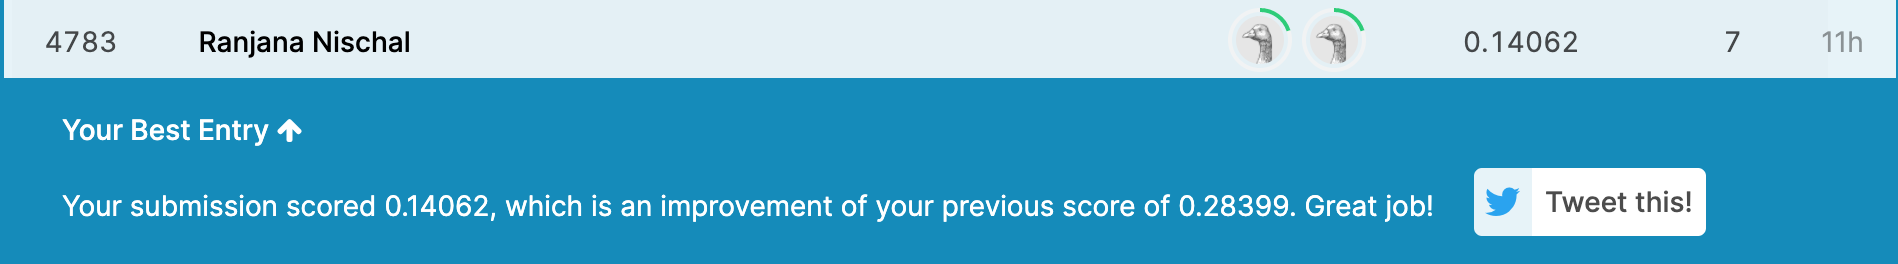

###8.1.b New score

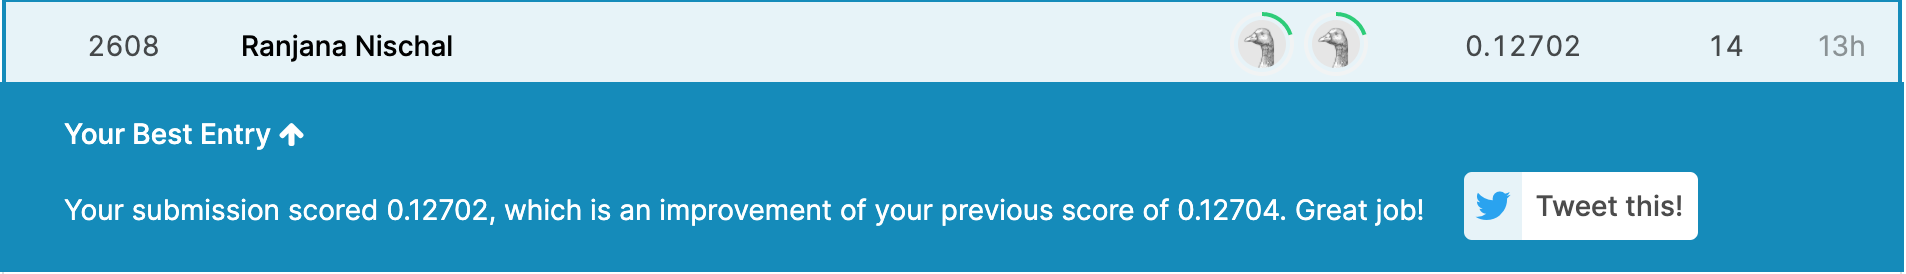

##8.2 Conclusions and Learnings




1.   Conclusion - We could observe some interesting facts about the value or price of houses in Ames, Iowa such as the houses with central air system increased the value of the houses.Also, few neighborhoods such as NorthRidge,NorthRidge Heights and Stone Brook had houses with significantly greater Sales price.Living area above ground is the most valuable feature in deciding the Sales price of a house. The biggest challenge was detection and removal of outliers(which we have achieved to some extent) and selection of features.Finally, we used a better model (Ridge) to predict the house prices after performing Cross validation and Statistical Inference. Ridge model had superior performance when compared to Linear regression or Bayseian as our data features had multicollinearity.


2.   Learnings - There was and will be a lot to learn from House price predictions project. We learned a step by step process on how to obtain the data, what should be the potential data population for our problem and get the data ready for exploratory data analysis. It also helped us better understand the process of future prediction(which is not an easy task manually, Thanks to Visualization!). We could apply practically the concepts taught in the class throughout the project phrases which was extremely helpful in understanding the course well. This project provided us with practical experience and an exposure to the real Data Scientist job in the career world.



#9 References

* https://www.kaggle.com/gcdatkin/top-10-house-price-regression-competition-nb/notebook
* https://githubmemory.com/repo/kcho316/housing_regression
* https://www.youtube.com/watch?v=zwYHloLXH0c&t=2357s